In [2]:
import numpy as np
import ast
import matplotlib.pyplot as plt


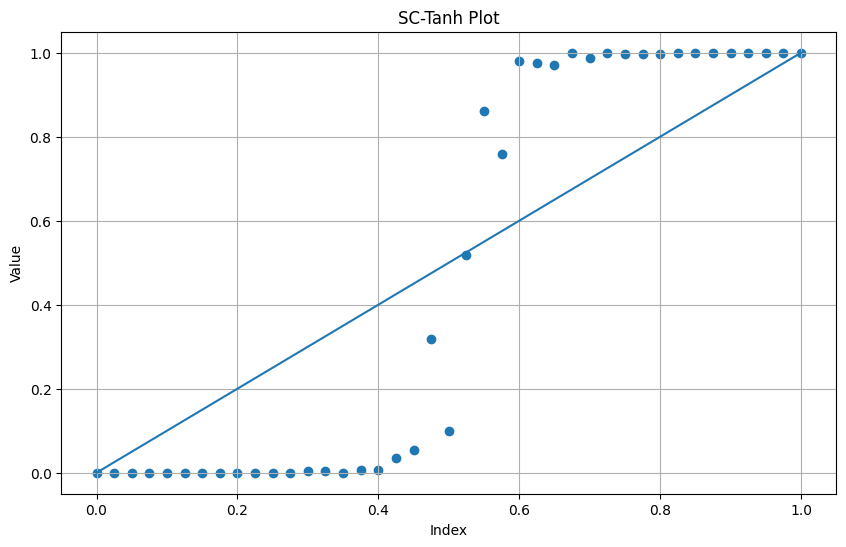

In [8]:
# test_tanh

file_path = "out_tanh.txt"  
with open(file_path, 'r') as file:
    content = file.read()
    array_strings = content.split('\n')  # Assuming the arrays are separated by two newlines

array1 = ast.literal_eval(array_strings[0])
array2 = ast.literal_eval(array_strings[1])
plt.figure(figsize=(10, 6))
plt.scatter(array1, array2)
plt.plot(array1, array1)
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('SC-Tanh Plot')
plt.grid()
plt.show()


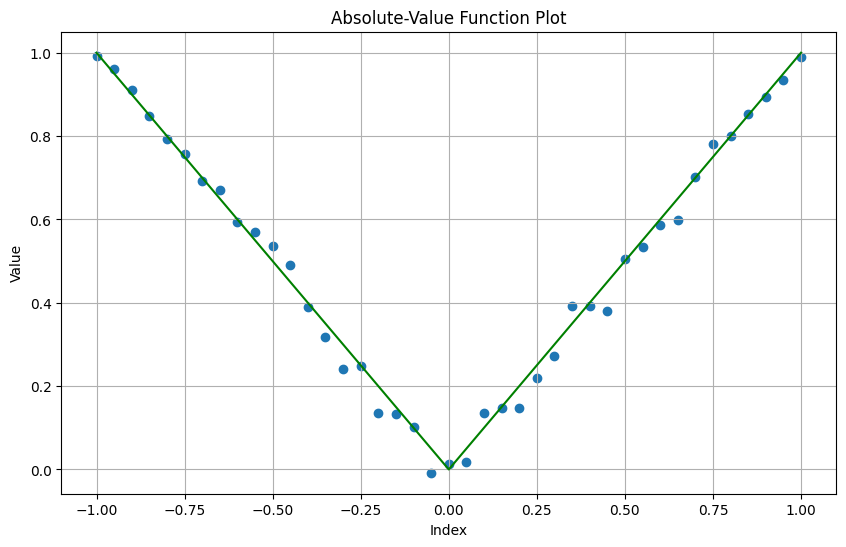

In [9]:
# test_abs

file_path = "out_abs.txt"  
with open(file_path, 'r') as file:
    content = file.read()
    array_strings = content.split('\n')  # Assuming the arrays are separated by two newlines

array1 = ast.literal_eval(array_strings[0])
array1 = np.array(array1)
array2 = ast.literal_eval(array_strings[1])
array2 = np.array(array2)
plt.figure(figsize=(10, 6))
plt.scatter(2*array1 - 1, 2*array2 - 1)
plt.plot(2*array1 - 1, np.abs(2*array1 - 1), "g")
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Absolute-Value Function Plot')
plt.grid()
plt.show()

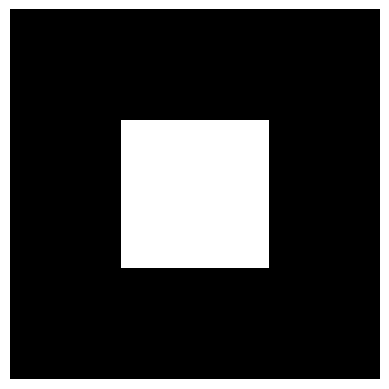

In [5]:
def create_bw_test_image(image_size=(100, 100), square_size=40):
    # Create a simple black and white image
    image = np.zeros(image_size, dtype=np.uint8)  # Black background

    # Draw a white square in the center
    start_x = (image_size[0] - square_size) // 2
    start_y = (image_size[1] - square_size) // 2
    image[start_x:start_x+square_size, start_y:start_y+square_size] = 255  # White square

    return image

image = create_bw_test_image()
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()



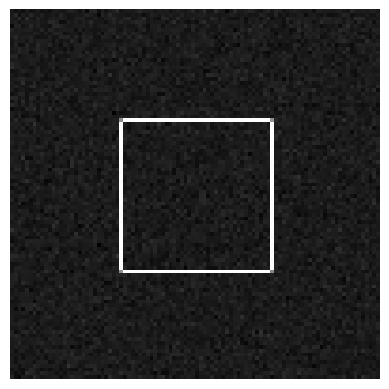

In [6]:
file_path = "out_edge_detect.txt"  
with open(file_path, 'r') as file:
    content = file.read()

array_image = ast.literal_eval(content)
array_image = (np.array(array_image))* 255
plt.imshow(array_image, cmap='gray')
plt.axis('off')
plt.show()